<a href="https://colab.research.google.com/github/tanishasin828126-hash/Trader-Performance-Vs-Market-Sentiment/blob/main/Trader_Performance_Vs_Market_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part A : Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
fear = pd.read_csv('fear_greed_index.csv')
trades = pd.read_csv('historical_data.csv')


/tmp/ipython-input-1860552070.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv('historical_data.csv')


In [3]:
print("Fear & Greed Shape:", fear.shape)  # no of rows and columns
print("Trades Shape:", trades.shape)


Fear & Greed Shape: (2644, 4)
Trades Shape: (111938, 16)


In [4]:
print(fear.columns)  #printing all columns
print(trades.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [5]:
print(fear.head())   #first 5 rows and numerical status
print(fear.describe())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000


In [6]:
print(trades.head())
print(trades.describe())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09451986a1874e3a9

In [7]:
fear.isnull().sum() # checking for null values
# no null values found

,0
timestamp,0
value,0
classification,0
date,0


In [8]:
trades.isnull().sum() # checking for null values
# 1 null value found in Trade Id,Fee, Timestamp each

,0
Account,0
Coin,1
Execution Price,1
Size Tokens,1
Size USD,1
Side,1
Timestamp IST,1
Start Position,1
Direction,1
Closed PnL,1


In [9]:
trades.fillna(0,inplace =True)       # replacing null values with zero

In [10]:
fear.duplicated().sum() # checking for duplicate value
# no duplicates are found

np.int64(0)

In [11]:
trades.duplicated().sum() # checking for duplicate value
# no duplicates are found

np.int64(0)

In [12]:
fear['date'] = pd.to_datetime(fear['date'])       #converting timestamps to date
fear['day'] = fear['date'].dt.date
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['day'] = trades['Timestamp'].dt.date
print(fear['date'],fear['day'])
print(trades['Timestamp'],trades['day'])           # both datasets have day as common column


0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: date, Length: 2644, dtype: datetime64[ns] 0       2018-02-01
1       2018-02-02
2       2018-02-03
3       2018-02-04
4       2018-02-05
           ...    
2639    2025-04-28
2640    2025-04-29
2641    2025-04-30
2642    2025-05-01
2643    2025-05-02
Name: day, Length: 2644, dtype: object
0        2024-10-27 03:33:20
1        2024-10-27 03:33:20
2        2024-10-27 03:33:20
3        2024-10-27 03:33:20
4        2024-10-27 03:33:20
                 ...        
111933   2025-06-15 15:06:40
111934   2025-06-15 15:06:40
111935   2025-06-15 15:06:40
111936   2025-06-15 15:06:40
111937   1970-01-01 00:00:00
Name: Timestamp, Length: 111938, dtype: datetime64[ns] 0         2024-10-27
1         2024-10-27
2         2024-10-27
3         2024-10-27
4         2024-10-27
             ...    
111933

In [13]:
trades['Account_short'] = trades['Account'].str[2:8]


In [14]:
merged = pd.merge(trades, fear, on='day', how='left')   #aligning both datasets by day
print(merged)

                                           Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
111933  0x8477e447846c758f5a675856001ea72298fd9cb5  FARTCOIN           1.0713   
111934  0x8477e447846c758f5a675856001ea72298fd9cb5  FARTCOIN           1.0713   
111935  0x8477e447846c758f5a675856001ea72298fd9cb5  FARTCOIN           1.0713   
111936  0x8477e447846c758f5a675856001ea72298fd9cb5  FARTCOIN           1.0719   
111937       0x8477e447846c758f5a675856001ea72298f         0           0.0000   

        Size Tokens  Size U

In [15]:
## Creating key Matrices

In [16]:
daily_pnl = merged.groupby(['Account_short', 'day'])['Closed PnL'].sum().reset_index() #Daily Pnl per trader
daily_pnl.rename(columns={'Closed PnL': 'Daily_PnL'}, inplace=True)



print(daily_pnl)


   Account_short         day     Daily_PnL
0         083384  2024-10-27 -3.275059e+05
1         083384  2025-02-19  1.927736e+06
2         23e7a7  2024-10-27  2.060745e+04
3         23e7a7  2025-02-19  1.709873e+04
4         23e7a7  2025-06-15  1.017915e+04
..           ...         ...           ...
57        b1231a  2024-10-27  1.421756e+06
58        b1231a  2025-02-19  5.538180e+05
59        b1231a  2025-06-15  1.024602e+05
60        baaaf6  2025-02-19  9.401572e+05
61        baaaf6  2025-06-15  6.593538e+00

[62 rows x 3 columns]


In [17]:
merged['Win'] = merged['Closed PnL'] > 0        # win rate per trader

win_rate = merged.groupby('Account_short')['Win'].mean().reset_index()
win_rate.rename(columns={'Win': 'Win_Rate'}, inplace=True)
print(win_rate)


   Account_short  Win_Rate
0         083384  0.359612
1         23e7a7  0.442720
2         3998f1  0.455215
3         420ab4  0.234987
4         430f09  0.484236
5         4f93fe  0.360364
6         513b86  0.401193
7         6d6a4b  0.431795
8         72c6a4  0.306294
9         75f7ee  0.810876
10        8381e6  0.330194
11        8477e4  0.309218
12        a0feb3  0.345787
13        ae5eac  0.408526
14        af40fd  0.322097
15        b1231a  0.337134
16        baaaf6  0.467582


In [18]:
avg_trade_size = merged.groupby('Account_short')['Size USD'].mean().reset_index() # Average trade size
avg_trade_size.rename(columns={'Size USD': 'Avg_Trade_Size'}, inplace=True)
print(avg_trade_size)

   Account_short  Avg_Trade_Size
0         083384    16159.576734
1         23e7a7     1653.226327
2         3998f1     1729.941104
3         420ab4     5189.367128
4         430f09     2397.824753
5         4f93fe    17098.171055
6         513b86    34396.580284
7         6d6a4b      746.725651
8         72c6a4     2133.667364
9         75f7ee     2600.778049
10        8381e6     6279.002287
11        8477e4      803.780157
12        a0feb3     1273.195000
13        ae5eac     2979.441776
14        af40fd     8330.193371
15        b1231a     3837.885375
16        baaaf6     3210.472831


In [19]:
merged['Risk_Level'] = pd.cut(
    merged['Size USD'],
    bins=[0, 1000, 5000, 10000, 50000, 100000, merged['Size USD'].max()],
    labels=['Very Low','Low','Medium','High','Very High','Extreme']
)





In [20]:
lev_dist = merged['Risk_Level'].value_counts().reset_index()  #overall leverage distribution
lev_dist.columns = ['Risk_Category','Number_of_Trades']
print(lev_dist)

  Risk_Category  Number_of_Trades
0      Very Low             63642
1           Low             28797
2          High              9809
3        Medium              6660
4     Very High              1719
5       Extreme              1279


In [21]:
trades_per_day = merged.groupby('day').size().reset_index(name='Trades_Count')    #no. of trades per day
print(trades_per_day)


          day  Trades_Count
0  1970-01-01             1
1  2023-03-28             3
2  2023-11-14          1045
3  2024-03-09          6962
4  2024-07-03          7097
5  2024-10-27         12253
6  2025-02-19         70032
7  2025-06-15         14545


In [22]:
long_short = merged.groupby(['day','Side']).size().unstack().fillna(0)    #Long Short Ratio Calculation
long_short['Long_Short_Ratio'] = long_short['BUY'] / long_short['SELL']
print(long_short)


Side          0      BUY     SELL  Long_Short_Ratio
day                                                
1970-01-01  1.0      0.0      0.0               NaN
2023-03-28  0.0      3.0      0.0               inf
2023-11-14  0.0    491.0    554.0          0.886282
2024-03-09  0.0   3371.0   3591.0          0.938736
2024-07-03  0.0   3472.0   3625.0          0.957793
2024-10-27  0.0   5414.0   6839.0          0.791636
2025-02-19  0.0  36210.0  33822.0          1.070605
2025-06-15  0.0   7440.0   7105.0          1.047150


 PART B - Data Analysis

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = trades.merge(fear[['day','value','classification']], on='day', how='left')   #Merging on classification

df.head()




,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,day,Account_short,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,ae5eac,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,ae5eac,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,ae5eac,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,ae5eac,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,ae5eac,74.0,Greed


In [25]:
pnl_sentiment = df.groupby('classification')['Closed PnL'].mean().sort_values()  #Avg Pnl by sentiment
pnl_sentiment


,Closed PnL
classification,
Neutral,24.411566
Extreme Greed,25.418772
Fear,70.932312
Greed,130.873196


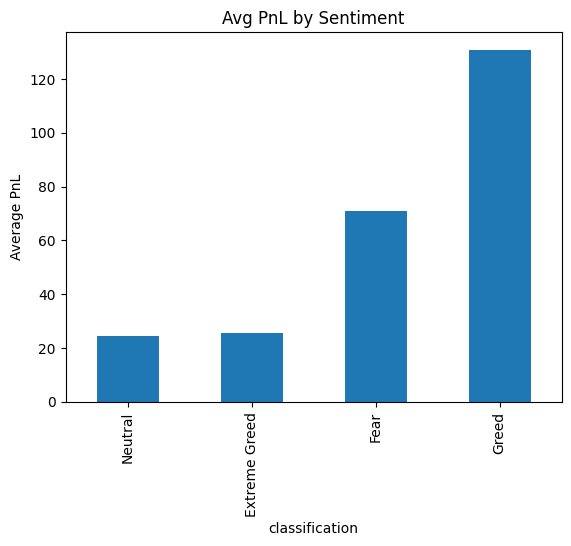

In [26]:
pnl_sentiment.plot(kind='bar', title='Avg PnL by Sentiment')     #If Fear > Greed → contrarian profit behavior
plt.ylabel("Average PnL")                                        #If Greed < Fear → FOMO losses
plt.show()




In [27]:
df['Result'] = df['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')    #analysis w.r.t profit and loss


In [28]:
profit_loss_counts = df.groupby(['classification', 'Result']).size().unstack().fillna(0)
profit_loss_counts


Result,Loss,Profit
classification,,
Extreme Greed,3550,3412
Fear,40048,29984
Greed,7863,5438
Neutral,4832,2265


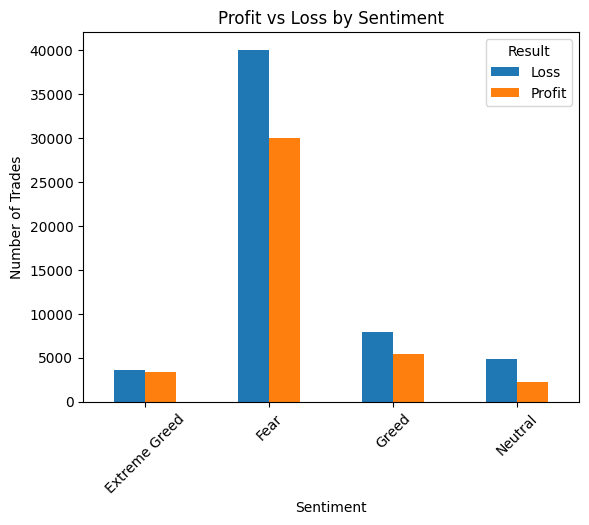

In [29]:
profit_loss_counts.plot(kind='bar', title='Profit vs Loss by Sentiment')
plt.ylabel("Number of Trades")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.show()



In [30]:
df['win'] = df['Closed PnL'] > 0     #win rate by sentiment

win_rate_sentiment = df.groupby('classification')['win'].mean()
win_rate_sentiment


,win
classification,
Extreme Greed,0.490089
Fear,0.428147
Greed,0.408841
Neutral,0.319149


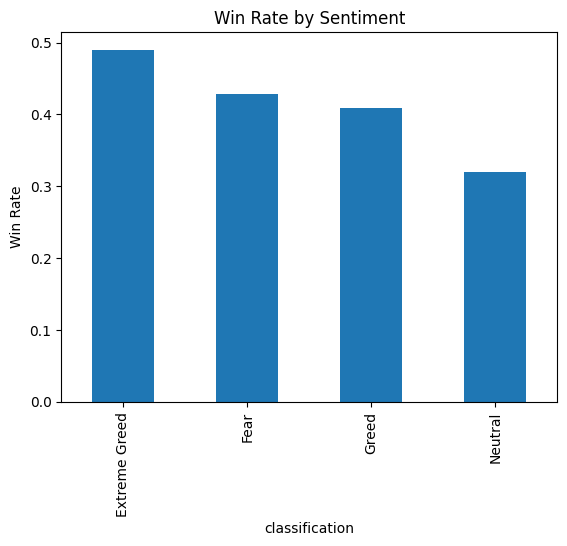

In [31]:
win_rate_sentiment.plot(kind='bar', title='Win Rate by Sentiment')
plt.ylabel("Win Rate")
plt.show()


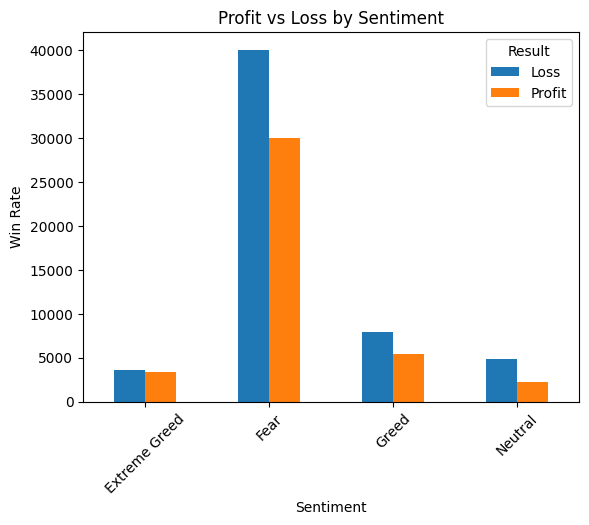

In [32]:
profit_loss_counts.plot(kind='bar', title='Profit vs Loss by Sentiment')    #w.r.t profit and loss
plt.ylabel("Win Rate")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.show()



In [33]:
drawdown_proxy = df.groupby('classification')['Closed PnL'].min()      #Bigger negative number = higher loss risk
drawdown_proxy


,Closed PnL
classification,
Extreme Greed,-21524.40000
Fear,-29370.11980
Greed,-117990.10410
Neutral,-18360.67007


In [34]:
trades_frequency = df.groupby(['day','classification']).size().reset_index(name='count')   #trade frequency vs sentiment

trades_frequency.groupby('classification')['count'].mean()


,count
classification,
Extreme Greed,6962.000000
Fear,70032.000000
Greed,4433.666667
Neutral,7097.000000


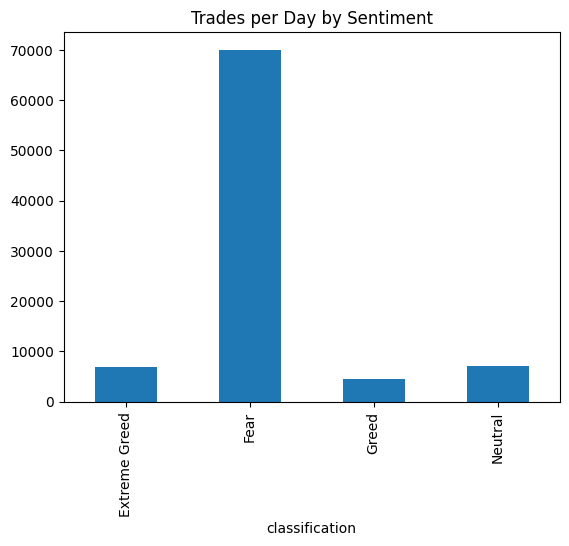

In [35]:
trades_frequency.groupby('classification')['count'].mean().plot(kind='bar', title='Trades per Day by Sentiment')
plt.show()
# Trader performance improves during Fear days

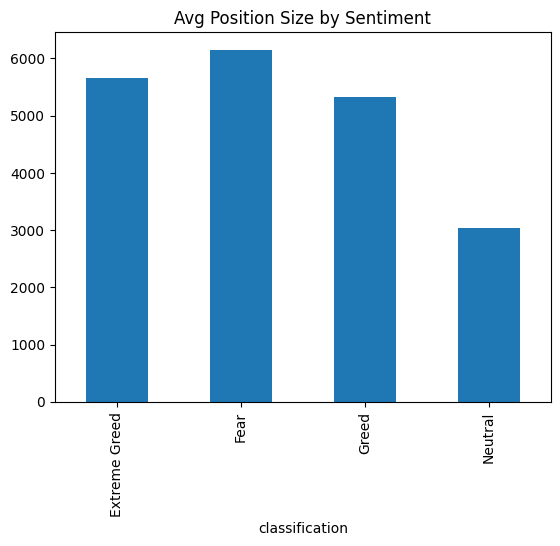

In [36]:
size_sentiment = df.groupby('classification')['Size USD'].mean()
size_sentiment.plot(kind='bar', title='Avg Position Size by Sentiment')
plt.show()
#Larger size in Greed -> risk-taking
#Smaller size in Fear -> caution

In [37]:
long_short = df.groupby(['classification','Side']).size().unstack().fillna(0)
long_short



Side,BUY,SELL
classification,,
Extreme Greed,3371,3591
Fear,36210,33822
Greed,5908,7393
Neutral,3472,3625


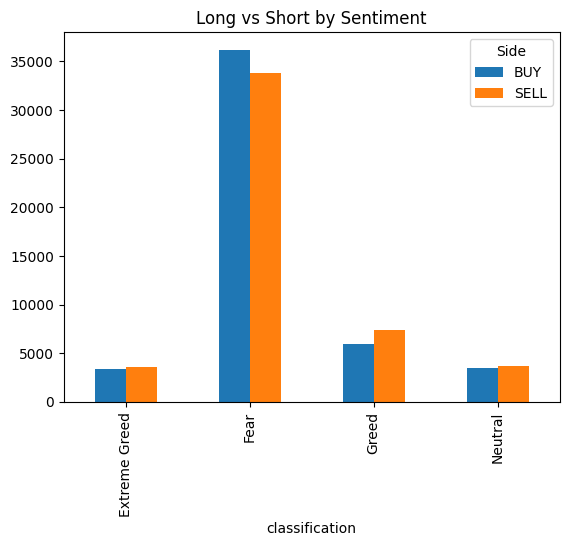

In [38]:
long_short.plot(kind='bar', title='Long vs Short by Sentiment')
plt.show()


In [39]:
# Count trades by Sentiment and Risk category
risk_vs_sentiment = merged.groupby(['classification','Risk_Level']).size().unstack().fillna(0)

risk_vs_sentiment



/tmp/ipython-input-789574476.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_vs_sentiment = merged.groupby(['classification','Risk_Level']).size().unstack().fillna(0)


Risk_Level,Very Low,Low,Medium,High,Very High,Extreme
classification,,,,,,
Extreme Greed,3320,1897,665,1007,69,4
Fear,41769,17425,3839,5356,1004,637
Greed,6439,4460,806,1367,192,27
Neutral,4604,1499,380,566,21,8


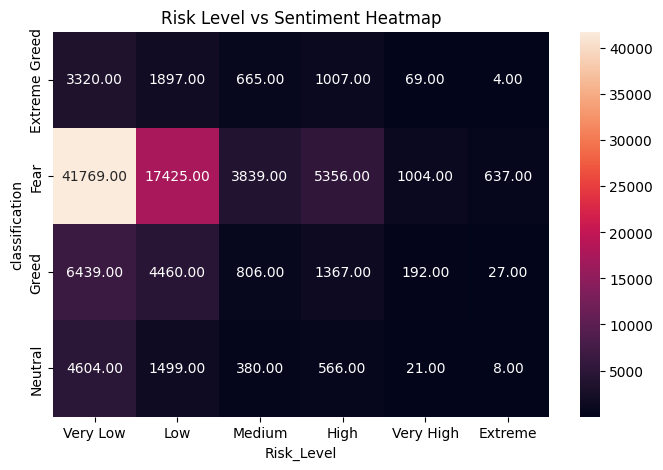

In [41]:

plt.figure(figsize=(8,5))
sns.heatmap(risk_vs_sentiment, annot=True, fmt=".2f")
plt.title("Risk Level vs Sentiment Heatmap")
plt.show()


In [42]:
trader_freq = df.groupby('Account').size()     #Frequent Vs Infrequent traders

threshold = trader_freq.median()

freq_group = trader_freq.apply(lambda x: 'Frequent' if x > threshold else 'Infrequent')

df['freq_group'] = df['Account'].map(freq_group)

df.groupby('freq_group')['Closed PnL'].mean()


,Closed PnL
freq_group,
Frequent,61.913577
Infrequent,159.473142


In [43]:
pnl_var = df.groupby('Account')['Closed PnL'].std()     #consisten vs inconsistent traders

consistent_group = pnl_var.apply(lambda x: 'Consistent' if x < pnl_var.median() else 'Inconsistent')

df['consistency'] = df['Account'].map(consistent_group)

df.groupby('consistency')['Closed PnL'].mean()


,Closed PnL
consistency,
Consistent,18.041950
Inconsistent,107.538035


PART C : Predicting traders next day profitability

In [44]:
daily = merged.groupby(['Account','day']).agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'Risk_Level':lambda x: x.mode()[0] if len(x.mode())>0 else 'Medium',
    'Side':'count'
}).reset_index()

daily.rename(columns={
    'Closed PnL':'daily_pnl',
    'Size USD':'avg_size',
    'Side':'trade_count'
}, inplace=True)


In [46]:
sent = merged[['day','classification','value']].drop_duplicates()

daily = daily.merge(sent, on='day', how='left')
print(sent)


               day classification  value
0       2024-10-27          Greed   74.0
190     2025-02-19           Fear   44.0
372     2025-06-15            NaN    NaN
18047   2024-03-09  Extreme Greed   84.0
18135   2024-07-03        Neutral   50.0
39055   2023-11-14          Greed   69.0
83769   2023-03-28          Greed   59.0
111937  1970-01-01            NaN    NaN


In [52]:
daily.columns


Index(['Account', 'day', 'daily_pnl', 'avg_size', 'Risk_Level', 'trade_count',
       'classification_x', 'value_x', 'classification_y', 'value_y',
       'next_day_pnl', 'profit_bucket'],
      dtype='object')

In [50]:
daily['next_day_pnl'] = daily.groupby('Account')['daily_pnl'].shift(-1)
daily['profit_bucket'] = daily['next_day_pnl'].apply(
    lambda x: 1 if x > 0 else 0
)

# 1= profitable tomorrow
# 0 = loss tomorrow

In [53]:
daily = pd.get_dummies(daily, columns=['classification_x','Risk_Level'], drop_first=True)


In [55]:
from sklearn.model_selection import train_test_split    # building simple ml model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [56]:
X = daily.drop(['Account','day','daily_pnl','next_day_pnl','profit_bucket'], axis=1)
y = daily['profit_bucket']


In [59]:
X.dtypes

,0
avg_size,float64
trade_count,int64
value_x,float64
classification_y,object
value_y,float64
classification_x_Fear,bool
classification_x_Greed,bool
classification_x_Neutral,bool
Risk_Level_Low,bool
Risk_Level_Medium,bool


In [60]:
X.select_dtypes(include='object').columns


Index(['classification_y'], dtype='object')

In [61]:
X = X.drop(columns=X.select_dtypes(include='object').columns)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)    # performing train test split


In [63]:
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [64]:
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,pred))


Accuracy: 0.7777777777777778
